In [1]:
# encoding: utf8

from __future__ import division

from os import path
import logging
import re
import json
import socket

import numpy as np
from scipy.io import loadmat

from wyrm import processing as proc
from wyrm.types import Data
from matplotlib import pyplot as plt
# from wyrm import plot
# plot.beautify()




def load_bci2_ds3(dirname):
    """
    Examples
    --------

    >>> left, right = load_bci2_ds3('/home/foo/bcicomp3_dataset1/')

    """
    # construct the filenames from the dirname
    data_file = path.sep.join([dirname, 'dataset_BCIcomp1.mat'])

    # load data
    data_mat = loadmat(data_file)
    
    # training data
    x_train = data_mat['x_train'].astype('double')
    # swap axes to make [class, channel, time]
    x_train = x_train.swapaxes(-1, -3)
    # swap axes to make [class, time, channel]
    x_train = x_train.swapaxes(-1, -2)
    
    labels = data_mat['y_train'].astype('int').ravel()
    
    # convert into wyrm Data
    axes = [np.arange(i) for i in x_train.shape]
    axes[0] = labels
    axes[2] = ['C3','Cz','C4']
    names = ['Class', 'Time', 'Channel']
    units = ['#', 'ms', '#']
    dat_train = Data(data=x_train, axes=axes, names=names, units=units)
    dat_train.fs = 128
    dat_train.class_names = ['left', 'right']
    # map labels 1 -> 0 and 2 -> 1 so as to match dat_train.class_names
    dat_train.axes[0][dat_train.axes[0] == 1] = 0
    dat_train.axes[0][dat_train.axes[0] == 2] = 1
    
    
    # test data
    x_test = data_mat['x_test'].astype('double')
    # swap axes to make [class, channel, time]
    x_test = x_test.swapaxes(-1, -3)
    # swap axes to make [class, time, channel]
    x_test = x_test.swapaxes(-1, -2)
    
    # convert into wyrm Data
    axes = [np.arange(i) for i in x_test.shape]
    axes[2] = ['C3','Cz','C4']
    names = ['Epoch', 'Time', 'Channel']
    units = ['#', 'ms', '#']
    dat_test = Data(data=x_test, axes=axes, names=names, units=units)
    dat_test.fs = 128
    
    return dat_train, dat_test

    
dat_train, dat_test = load_bci2_ds3('C:\Users\Eniola\Documents\Educational\Research\data\competitionii_dataiii')

<IPython.core.display.Javascript object>


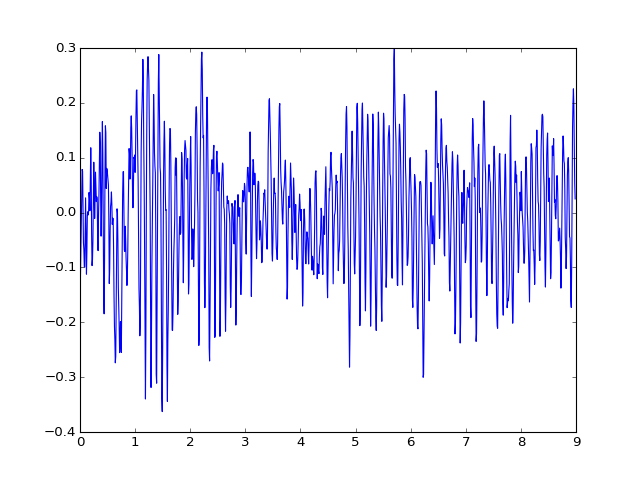

In [4]:
%matplotlib notebook

intv=1151

#plt.figure(1)

#This is plotting the graph of the first class
plt.plot(proc.select_ival(dat_train, [0, intv]).axes[1]/dat_train.fs, #selecting time interval to plt
          proc.select_ival(proc.select_channels(dat_train, ['C3']), 
                           [0, intv]).data[10]) 

plt.show()

<IPython.core.display.Javascript object>


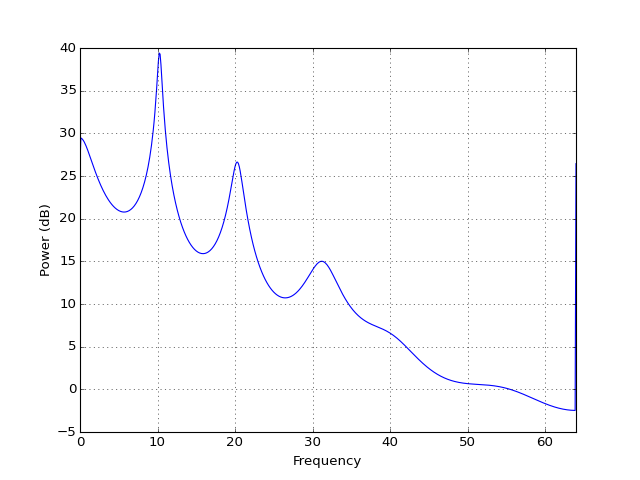

In [6]:
%matplotlib notebook

from spectrum import *
from wyrm import processing as proc
from pylab import *

dat_select = proc.select_channels(dat_train, ['C3'])
#print dat_select.data[139].shape
p = pburg(dat_select.data[10].ravel(), 15, NFFT=1152, sampling=128)
p()
p.plot(sides='onesided')
